In [6]:
import os
import pandas as pd
import cv2
import numpy as np

In [19]:
bss = 'fishes/Black Sea Sprat/'
bssgt = 'fishes/Black Sea Sprat GT/'

allbss = os.listdir(bss)
allgt = os.listdir(bssgt)

bssindex = int(len(allbss)*0.8)
gtindex = int(len(allgt)*0.8)

trainbss = allbss[:bssindex]
testbss = allbss[bssindex:]

traingt = allgt[:gtindex]
testgt = allgt[gtindex:]

!mkdir -p fish/train/bss
!mkdir -p fish/train/gt

!mkdir -p fish/test/bss
!mkdir -p fish/test/gt

import shutil
for i in range(len(trainbss)):
    shutil.copy(bss+trainbss[i], 'fish/train/bss/'+trainbss[i])

for i in range(len(traingt)):
    shutil.copy(bssgt+traingt[i], 'fish/train/gt/'+traingt[i])

for i in range(len(testbss)):
    shutil.copy(bss+testbss[i], 'fish/test/bss/'+testbss[i])

for i in range(len(testgt)):
    shutil.copy(bssgt+testgt[i], 'fish/test/gt/'+testgt[i])

In [11]:
directory = 'fish/train/'
train_files = []
target_files = []
mask = []
img = []
fish_types = 'Black Sea Sprat'

for file in os.listdir(os.path.join(directory, fish_types)):
    train_files.append(os.path.join(directory, 'Black Sea Sprat', file))
    target_files.append(os.path.join(directory,  'Black Sea Sprat GT', file))
    origImage = cv2.imread(os.path.join(directory,  'Black Sea Sprat GT', file))
    img.append(origImage)

    origImage = cv2.cvtColor(origImage, cv2.COLOR_BGR2GRAY)
    origImage = (origImage ) 
    mask.append(origImage**2)

In [13]:
df_train = pd.DataFrame({'img' : train_files, 'mask' : target_files, 'mask_2' : mask, 'img_2': img})
df_train.head()

,img,mask,mask_2,img_2
0,fish/train/Black Sea Sprat/00780.png,fish/train/Black Sea Sprat GT/00780.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,fish/train/Black Sea Sprat/00476.png,fish/train/Black Sea Sprat GT/00476.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,fish/train/Black Sea Sprat/00394.png,fish/train/Black Sea Sprat GT/00394.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,fish/train/Black Sea Sprat/00333.png,fish/train/Black Sea Sprat GT/00333.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,fish/train/Black Sea Sprat/00369.png,fish/train/Black Sea Sprat GT/00369.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [7]:
directory = 'fish/test/'
test_files = []
target_test_files = []
mask = []
img = []
fish_types = 'Black Sea Sprat'
for file in os.listdir(os.path.join(directory, fish_types)):
    test_files.append(os.path.join(directory, 'Black Sea Sprat', file))
    target_test_files.append(os.path.join(directory,  'Black Sea Sprat GT', file))

    origImage = cv2.imread(os.path.join(directory,  'Black Sea Sprat GT', file))
    img.append(origImage)
    origImage = cv2.cvtColor(origImage, cv2.COLOR_BGR2GRAY)
    origImage = (origImage ) 
    mask.append(origImage**2)

In [8]:
df_test = pd.DataFrame({'img' : test_files, 'mask' : target_test_files, 'mask_2': mask, 'img_2': img})
df_test.head()

,img,mask,mask_2,img_2
0,fish/test/Black Sea Sprat/00940.png,fish/test/Black Sea Sprat GT/00940.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,fish/test/Black Sea Sprat/00846.png,fish/test/Black Sea Sprat GT/00846.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,fish/test/Black Sea Sprat/00837.png,fish/test/Black Sea Sprat GT/00837.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,fish/test/Black Sea Sprat/00943.png,fish/test/Black Sea Sprat GT/00943.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,fish/test/Black Sea Sprat/00832.png,fish/test/Black Sea Sprat GT/00832.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [9]:
def keras_generator(gen_df, batch_size):
    while True:
        x_batch = []
        y_batch = []
        
        for i in range(batch_size):
            _, __, mask, img, = gen_df.sample(1).values[0]
            img = cv2.resize(img, (256, 256))
            mask = cv2.resize(mask, (256, 256))
            mask =( mask > 0) **2
            
            x_batch += [img]
            y_batch += [mask]

        x_batch = np.array(x_batch) / 255.
        y_batch = np.array(y_batch)

        yield x_batch, np.expand_dims(y_batch, -1)

In [14]:
for x, y in keras_generator(df_train, 16):
    break

x.shape

(16, 256, 256, 3)

In [2]:
import keras
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, UpSampling2D, Conv2D, MaxPooling2D, Activation
from keras.layers import Input, Dense

inp = Input(shape=(256, 256, 3))

conv_1_1 = Conv2D(32, (3, 3), padding='same')(inp)
conv_1_1 = Activation('relu')(conv_1_1)

conv_1_2 = Conv2D(32, (3, 3), padding='same')(conv_1_1)
conv_1_2 = Activation('relu')(conv_1_2)

pool_1 = MaxPooling2D(2)(conv_1_2)


conv_2_1 = Conv2D(64, (3, 3), padding='same')(pool_1)
conv_2_1 = Activation('relu')(conv_2_1)

conv_2_2 = Conv2D(64, (3, 3), padding='same')(conv_2_1)
conv_2_2 = Activation('relu')(conv_2_2)

pool_2 = MaxPooling2D(2)(conv_2_2)


conv_3_1 = Conv2D(128, (3, 3), padding='same')(pool_2)
conv_3_1 = Activation('relu')(conv_3_1)

conv_3_2 = Conv2D(128, (3, 3), padding='same')(conv_3_1)
conv_3_2 = Activation('relu')(conv_3_2)

pool_3 = MaxPooling2D(2)(conv_3_2)


conv_4_1 = Conv2D(256, (3, 3), padding='same')(pool_3)
conv_4_1 = Activation('relu')(conv_4_1)

conv_4_2 = Conv2D(256, (3, 3), padding='same')(conv_4_1)
conv_4_2 = Activation('relu')(conv_4_2)

pool_4 = MaxPooling2D(2)(conv_4_2)

up_1 = UpSampling2D(2, interpolation='bilinear')(pool_4)
conv_up_1_1 = Conv2D(256, (3, 3), padding='same')(up_1)
conv_up_1_1 = Activation('relu')(conv_up_1_1)

conv_up_1_2 = Conv2D(256, (3, 3), padding='same')(conv_up_1_1)
conv_up_1_2 = Activation('relu')(conv_up_1_2)


up_2 = UpSampling2D(2, interpolation='bilinear')(conv_up_1_2)
conv_up_2_1 = Conv2D(128, (3, 3), padding='same')(up_2)
conv_up_2_1 = Activation('relu')(conv_up_2_1)

conv_up_2_2 = Conv2D(128, (3, 3), padding='same')(conv_up_2_1)
conv_up_2_2 = Activation('relu')(conv_up_2_2)


up_3 = UpSampling2D(2, interpolation='bilinear')(conv_up_2_2)
conv_up_3_1 = Conv2D(64, (3, 3), padding='same')(up_3)
conv_up_3_1 = Activation('relu')(conv_up_3_1)

conv_up_3_2 = Conv2D(64, (3, 3), padding='same')(conv_up_3_1)
conv_up_3_2 = Activation('relu')(conv_up_3_2)



up_4 = UpSampling2D(2, interpolation='bilinear')(conv_up_3_2)
conv_up_4_1 = Conv2D(32, (3, 3), padding='same')(up_4)
conv_up_4_1 = Activation('relu')(conv_up_4_1)

conv_up_4_2 = Conv2D(1, (3, 3), padding='same')(conv_up_4_1)
result = Activation('sigmoid')(conv_up_4_2)


model = Model(inputs=inp, outputs=result)

2022-11-29 20:35:09.765994: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-29 20:35:09.866436: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-11-29 20:35:09.866529: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-11-29 20:35:09.868939: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (o

In [123]:
from tensorflow import keras

best_w = keras.callbacks.ModelCheckpoint('fcn_best.h5',
                                monitor='val_loss',
                                verbose=0,
                                save_best_only=True,
                                save_weights_only=True,
                                mode='auto',
                                period=1)

last_w = keras.callbacks.ModelCheckpoint('fcn_last.h5',
                                monitor='val_loss',
                                verbose=0,
                                save_best_only=False,
                                save_weights_only=True,
                                mode='auto',
                                period=1)


callbacks = [best_w, last_w]



adam = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)


model.compile(adam, 'binary_crossentropy')

/home/maksat/.local/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [124]:
batch_size = 16
model.fit(keras_generator(df_train, batch_size),
              steps_per_epoch=100,
              epochs=5,
              verbose=1,
              callbacks=callbacks,
              validation_data=keras_generator(df_test, batch_size),
              validation_steps=50,
              class_weight=None,
              max_queue_size=10,
              workers=1,
              use_multiprocessing=False,
              shuffle=True,
              initial_epoch=0)

Epoch 1/5
100/100 [==============================] - 25s 239ms/step - loss: 0.1826 - val_loss: 0.0192
Epoch 2/5
100/100 [==============================] - 24s 238ms/step - loss: 0.0156 - val_loss: 0.0157
Epoch 3/5
100/100 [==============================] - 24s 245ms/step - loss: 0.0135 - val_loss: 0.0134
Epoch 4/5
100/100 [==============================] - 24s 239ms/step - loss: 0.0120 - val_loss: 0.0121
Epoch 5/5
100/100 [==============================] - 24s 240ms/step - loss: 0.0109 - val_loss: 0.0123


In [3]:
# load weights

model = Model(inputs=inp, outputs=result)
model.load_weights('fcn_best.h5')

In [19]:
for x_test, y_test in keras_generator(df_test, 16):
    break

pred = model.predict(x_test)

In [20]:
import numpy as np

target = y_test
def dice_coeff(pred, target):
    m1 = np.array(pred).flatten()
    m2 = np.array(target).flatten()

    intersection = np.sum(m1 * m2)

    return (2. * intersection ) / (m1.sum() + m2.sum() )

print(dice_coeff(pred, target))

0.9673564908974112


In [21]:
dices = 0
for i in range(len(df_test)):
    dices = dices + dice_coeff(pred, target)
average_dice = dices/len(df_test)

average_dice

0.967356490897409

In [172]:
pred.tofile('pred.txt', sep=" ", format="%s")

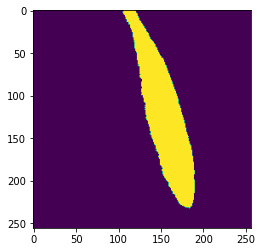

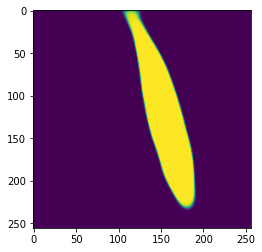

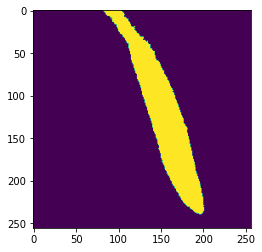

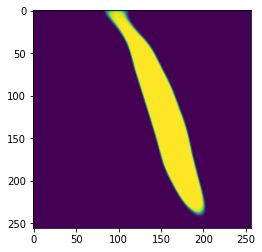

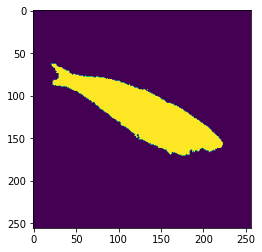

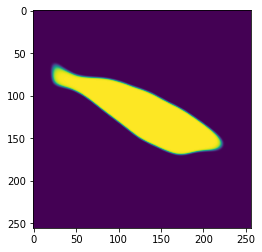

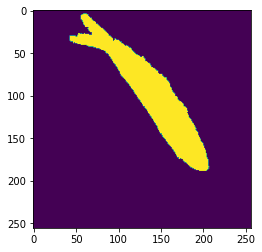

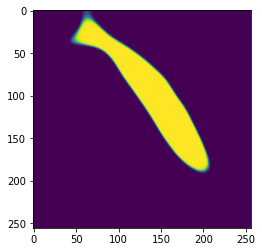

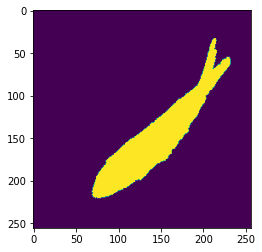

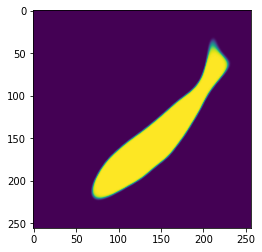

In [27]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.imshow(target[i])
    plt.show()
    plt.imshow(pred[i])
    plt.show()